<H1>Pytorch tutorial</H1>
This python notebook was created to practise and learn how to create a basic convolutional neural network using pytorch to train the model on the open source MNIST dataset that contains the handwritten digit to classify them from 0-9

PyTorch is an open-source machine learning library for Python, based on Torch, used for applications such as natural language processing. It is primarily developed by Facebook's artificial-intelligence research group, and Uber's "Pyro" Probabilistic programming language software is built on it.

<h1>Importing the packages</h1>

In [20]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import transforms, datasets

In [13]:
DATA_PATH = 'dataset/'
batch_size = 32
learning_rate = 0.001
epochs = 1

<h2>Adding the dataset and the MNIST dataset</h2>

In [14]:
trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
train_dataset = datasets.MNIST(root=DATA_PATH, train=True, transform=trans, download=True)
test_dataset = datasets.MNIST(root=DATA_PATH, train=False, transform=trans)

In [15]:
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

<h2>Defining the architecture of the CNN</h2>

In [16]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.fc1 = nn.Linear(7*7*32, 1000)
        self.fc2 = nn.Linear(1000, 10)
    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = x.reshape(x.size(0), -1)
        x = self.fc1(x)
        x = self.fc2(x)
        return x

In [17]:
model = CNNModel()
loss = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

<h2>Training the model</h2>

In [18]:
loss_history = []
accuracy_history = []
batches = len(train_loader)
for j in range(0, epochs):
    for i, (images, labels) in enumerate(train_loader):
        outputs = model(images)
        error = loss(outputs, labels)
        loss_history.append(error.item())
        
        # Backprop and perform Adam optimisation
        optimizer.zero_grad()
        error.backward()
        optimizer.step()
        
        # Track the accuracy
        total = labels.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct = (predicted == labels).sum().item()
        accuracy_history.append(correct / total)

        if (i + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
                  .format(j + 1, epochs, i + 1, batches, error.item(),
                          (correct / total) * 100))

Epoch [1/1], Step [100/1875], Loss: 0.1675, Accuracy: 93.75%
Epoch [1/1], Step [200/1875], Loss: 0.0267, Accuracy: 100.00%
Epoch [1/1], Step [300/1875], Loss: 0.1572, Accuracy: 96.88%
Epoch [1/1], Step [400/1875], Loss: 0.1666, Accuracy: 96.88%
Epoch [1/1], Step [500/1875], Loss: 0.0084, Accuracy: 100.00%
Epoch [1/1], Step [600/1875], Loss: 0.0182, Accuracy: 100.00%
Epoch [1/1], Step [700/1875], Loss: 0.2444, Accuracy: 93.75%
Epoch [1/1], Step [800/1875], Loss: 0.1113, Accuracy: 93.75%
Epoch [1/1], Step [900/1875], Loss: 0.0083, Accuracy: 100.00%
Epoch [1/1], Step [1000/1875], Loss: 0.1076, Accuracy: 96.88%
Epoch [1/1], Step [1100/1875], Loss: 0.0129, Accuracy: 100.00%
Epoch [1/1], Step [1200/1875], Loss: 0.0038, Accuracy: 100.00%
Epoch [1/1], Step [1300/1875], Loss: 0.1307, Accuracy: 96.88%
Epoch [1/1], Step [1400/1875], Loss: 0.0125, Accuracy: 100.00%
Epoch [1/1], Step [1500/1875], Loss: 0.0016, Accuracy: 100.00%
Epoch [1/1], Step [1600/1875], Loss: 0.1857, Accuracy: 96.88%
Epoch [1/

<H2>Evaluating the trained model</H2>

In [54]:
model.eval()
# Test the model
model.eval()
with torch.no_grad():
    correct, total = 0, 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    print('Test Accuracy of the model on the 10000 test images: {} %'.format((correct / total) * 100))

Test Accuracy of the model on the 10000 test images: 98.42 %


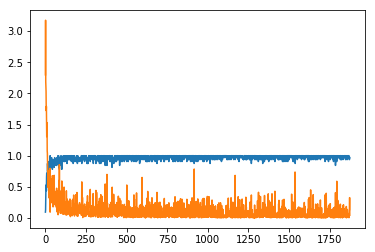

In [97]:
plt.plot(accuracy_history)
plt.plot(loss_history)
plt.savefig('result.png', dpi=300)

<H2>Predicting the results</H2>

The predicted output of the image is 5
The true value of the image is 5


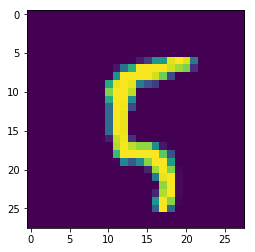

In [91]:
import matplotlib.pyplot as plt
import numpy as np
# select any of the image from the dataset by 
image_index = 100
image, label = train_dataset[image_index]
test_image = np.array(image)
prediction = model(np.reshape(image, (1, 1, 28, 28)))
print("The predicted output of the image is {}".format(prediction.argmax()))
print("The true value of the image is {}".format(label))
plt.imshow(test_image[0])